### Accessing JSON data through an API
#### Yelp Fusion API
1. Obtain a Yelp Fusion Developer Account here: https://fusion.yelp.com/ Use your student email and access your email to verify your account.
2. Create a Yelp Fusion App.  Login to your Yelp developer account, and select Manage App under General.  Enter an App Name (such as Review Sentiments), your email and a description. 
3. Save your client id and api key in a separate (private) .py file.  This script assumes that this information is saved in yelpkeys.py with the variables client_id and api_key respectively.
4. Import your id and key into your notebook by importing the file containing this private information.


In [87]:
import requests
import yelpkeys  # file where client_id and api_key is defined with user's private app information
from textblob import TextBlob

In [88]:
APIKEY = yelpkeys.apiKey
headers = {'Authorization': 'Bearer %s' % yelpkeys.apiKey,}

In [89]:
"""
Yelp Fusion API code sample.
This program demonstrates the capability of the Yelp Fusion API
by using the Search API to query for businesses by a search term and location,
and the Business API to query additional information about the top result
from the search query.
Please refer to https://docs.developer.yelp.com/docs/get-started for the API
documentation.
This program requires the Python requests library, which you can install via:
`pip install -r requirements.txt`.
Sample usage of the program:
`python sample.py --term="bars" --location="San Francisco, CA"`
"""
from __future__ import print_function

import argparse
import json
import pprint
import requests
import sys
import urllib


# This client code can run on Python 2.x or 3.x.  Your imports can be
# simpler if you only need one of those.
try:
    # For Python 3.0 and later
    from urllib.error import HTTPError
    from urllib.parse import quote
    from urllib.parse import urlencode
except ImportError:
    # Fall back to Python 2's urllib2 and urllib
    from urllib2 import HTTPError
    from urllib import quote
    from urllib import urlencode


# Yelp Fusion no longer uses OAuth as of December 7, 2017.
# You no longer need to provide Client ID to fetch Data
# It now uses private keys to authenticate requests (API Key)
# You can find it on
# https://www.yelp.com/developers/v3/manage_app
API_KEY= yelpkeys.apiKey


# API constants, you shouldn't have to change these.
API_HOST = 'https://api.yelp.com'
SEARCH_PATH = '/v3/businesses/search'
BUSINESS_PATH = '/v3/businesses/'  # Business ID will come after slash.


# Defaults for our simple example.
DEFAULT_TERM = 'dinner'
DEFAULT_LOCATION = 'New York, NY'
SEARCH_LIMIT = 50


def request(host, path, api_key, url_params=None):
    """Given your API_KEY, send a GET request to the API.
    Args:
        host (str): The domain host of the API.
        path (str): The path of the API after the domain.
        API_KEY (str): Your API Key.
        url_params (dict): An optional set of query parameters in the request.
    Returns:
        dict: The JSON response from the request.
    Raises:
        HTTPError: An error occurs from the HTTP request.
    """
    url_params = url_params or {}
    url = '{0}{1}'.format(host, quote(path.encode('utf8')))
    headers = {
        'Authorization': 'Bearer %s' % api_key,
    }

    print(u'Querying {0} ...'.format(url))

    response = requests.request('GET', url, headers=headers, params=url_params)

    return response.json()


def search(api_key, term, location):
    """Query the Search API by a search term and location.
    Args:
        term (str): The search term passed to the API.
        location (str): The search location passed to the API.
    Returns:
        dict: The JSON response from the request.
    """

    url_params = {
        'term': term.replace(' ', '+'),
        'location': location.replace(' ', '+'),
        'limit': SEARCH_LIMIT
    }
    return request(API_HOST, SEARCH_PATH, api_key, url_params=url_params)


def get_business(api_key, business_id):
    """Query the Business API by a business ID.
    Args:
        business_id (str): The ID of the business to query.
    Returns:
        dict: The JSON response from the request.
    """
    business_path = BUSINESS_PATH + business_id

    return request(API_HOST, business_path, api_key)


def query_api(term, location):
    """Queries the API by the input values from the user.
    Args:
        term (str): The search term to query.
        location (str): The location of the business to query.
    """
    response = search(API_KEY, term, location)

    businesses = response.get('businesses')

    if not businesses:
        print(u'No businesses for {0} in {1} found.'.format(term, location))
        return

    business_id = businesses[0]['id']

    print(u'{0} businesses found, querying business info ' \
        'for the top result "{1}" ...'.format(
            len(businesses), business_id))
    response = get_business(API_KEY, business_id)

    print(u'Result for business "{0}" found:'.format(business_id))
    pprint.pprint(response, indent=2)

In [90]:
response = search(API_KEY,DEFAULT_TERM, DEFAULT_LOCATION)

Querying https://api.yelp.com/v3/businesses/search ...


In [91]:
response

{'businesses': [{'id': '47-Zk7oz8-jVS2zvXbZgHQ',
   'alias': 'bar-56-brooklyn',
   'name': 'Bar 56',
   'image_url': 'https://s3-media2.fl.yelpcdn.com/bphoto/0QEkX14W2_AluaM7vR15FQ/o.jpg',
   'is_closed': False,
   'url': 'https://www.yelp.com/biz/bar-56-brooklyn?adjust_creative=kMnX6yKjlI1z7FdxAqaC6A&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_search&utm_source=kMnX6yKjlI1z7FdxAqaC6A',
   'review_count': 9,
   'categories': [{'alias': 'newamerican', 'title': 'New American'},
    {'alias': 'wine_bars', 'title': 'Wine Bars'}],
   'rating': 5.0,
   'coordinates': {'latitude': 40.70343572990792,
    'longitude': -73.99241567954792},
   'transactions': [],
   'location': {'address1': '53 Water St',
    'address2': '',
    'address3': None,
    'city': 'Brooklyn',
    'zip_code': '11201',
    'country': 'US',
    'state': 'NY',
    'display_address': ['53 Water St', 'Brooklyn, NY 11201']},
   'phone': '',
   'display_phone': '',
   'distance': 273.78506922056187},
  {'id': 'XfOCJ841

In [92]:
for business in response['businesses']:
    print(response)
    print('Business Name: ' + business['name'])
    print('Rating: ' + str(business['rating']))
    print('Review Count: ' + str(business['review_count']))
    print('Reviews: ')
    BUS_REVIEW='/v3/businesses/{}/reviews'.format(business['id'])
    #print('https://api.yelp.com/v3/businesses/{}/reviews?limit=20&sort_by=yelp_sort'.format(business['id']))
    reviews = request(API_HOST,BUS_REVIEW, API_KEY)
    for review in reviews['reviews']:
        pprint.pprint(' - ' + review['text'])
        # Perform sentiment analysis on the review using TextBlob
        blob = TextBlob(review['text'])
        sentiment = blob.sentiment.polarity
        if sentiment > 0:
            print('    Sentiment: Positive')
        elif sentiment < 0:
            print('    Sentiment: Negative')
        else:
            print('    Sentiment: Neutral')
        print('\n================\n\n\n')

{'businesses': [{'id': '47-Zk7oz8-jVS2zvXbZgHQ', 'alias': 'bar-56-brooklyn', 'name': 'Bar 56', 'image_url': 'https://s3-media2.fl.yelpcdn.com/bphoto/0QEkX14W2_AluaM7vR15FQ/o.jpg', 'is_closed': False, 'url': 'https://www.yelp.com/biz/bar-56-brooklyn?adjust_creative=kMnX6yKjlI1z7FdxAqaC6A&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_search&utm_source=kMnX6yKjlI1z7FdxAqaC6A', 'review_count': 9, 'categories': [{'alias': 'newamerican', 'title': 'New American'}, {'alias': 'wine_bars', 'title': 'Wine Bars'}], 'rating': 5.0, 'coordinates': {'latitude': 40.70343572990792, 'longitude': -73.99241567954792}, 'transactions': [], 'location': {'address1': '53 Water St', 'address2': '', 'address3': None, 'city': 'Brooklyn', 'zip_code': '11201', 'country': 'US', 'state': 'NY', 'display_address': ['53 Water St', 'Brooklyn, NY 11201']}, 'phone': '', 'display_phone': '', 'distance': 273.78506922056187}, {'id': 'XfOCJ841dL9fPBY_BAyayA', 'alias': 'soboku-brooklyn', 'name': 'SOBOKU', 'image_url': 'htt

In [93]:
#r = json.loads()

### Simple code for creating a donut chart (courtesy of chatGPT)

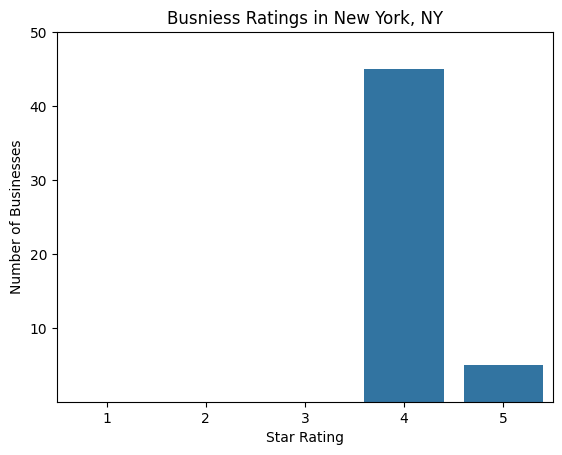

In [94]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define data
oneStar = []
twoStar = []
threeStar = []
fourStar = []
fiveStar = []
for business in response['businesses']:
    business['rating'] = int(business['rating'])
    if business['rating'] % 5 == 1:
        oneStar.append(business['name'])
    elif business['rating'] % 5 == 2:
        twoStar.append(business['name'])
    elif business['rating'] % 5 == 3:
        threeStar.append(business['name'])
    elif business['rating'] % 5 == 4:
        fourStar.append(business['name'])
    elif business['rating'] % 5 == 0:
        fiveStar.append(business['name'])

# Create donut chart
starChart = sns.barplot(x = [1,2,3,4,5], y = [len(oneStar), len(twoStar), len(threeStar), len(fourStar), len(fiveStar)])
starChart.set_title('Busniess Ratings in New York, NY')
plt.xlabel("Star Rating")
plt.ylabel("Number of Businesses")
plt.yticks([10, 20, 30, 40, 50])

# Show graphic
plt.show()